* **Sánchez Martínez Felipe** 6BM1

# Redes neuronales convolucionales

Una red neuronal convolucional (CNN por sus siglas en inglés, Convolutional Neural Network) es un tipo de red neuronal artificial especialmente diseñada para procesar datos que tienen una estructura de cuadrícula, como imágenes. Está inspirada en el funcionamiento del sistema visual biológico y es muy efectiva en tareas de reconocimiento visual y clasificación de imágenes.

Lo que hace única a una CNN es su capacidad para detectar patrones locales en datos de entrada utilizando filtros convolucionales. Estos filtros son pequeñas matrices numéricas que se deslizan sobre la imagen de entrada para realizar operaciones de convolución. Esta operación de convolución permite a la red extraer características relevantes de la imagen, como bordes, texturas o formas.

En este notebook implementaremos una capa convolucional usando python y numpy. Pondremos énfasis en la implementación de la convolución a partir de los hiper-parámetros de la capa convolucional. En particular usaremos la variante de correlación cruzada que se define de la siguiente forma:

$$
	G[i,j] =  \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] I[i+u,j+v]
$$
donde $I$ es la ntrada y $H$ el kernel.

Visualmente tendríamos algo similar a la siguiente figura. Donde la imagen original esta en azul y la imagen resultante está en verde.

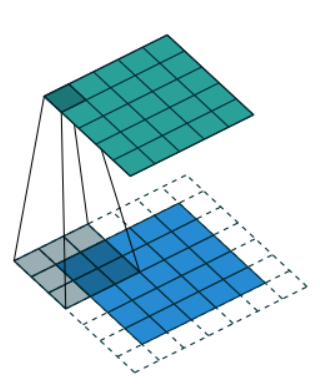


Como entrada usaremos una imagen popular en visión computacional, Lenna. Y, si todo sale bien, la salida deberá realizar la detección de bordes verticales.

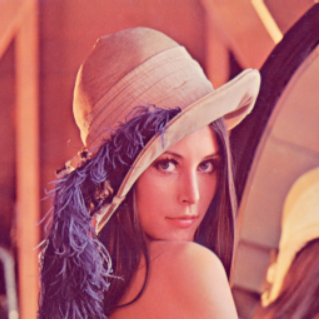

In [14]:
# Paquetes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Dimensiones de la imagen: (256, 256)
Tipo de datos de la matriz: uint8
Matriz de la imagen:
[[226 223 226 ... 230 232 211]
 [226 223 226 ... 230 232 211]
 [226 224 226 ... 221 216 185]
 ...
 [ 90  92  97 ... 140 158 162]
 [ 86  92  95 ... 154 171 171]
 [ 83  94  95 ... 167 178 183]]


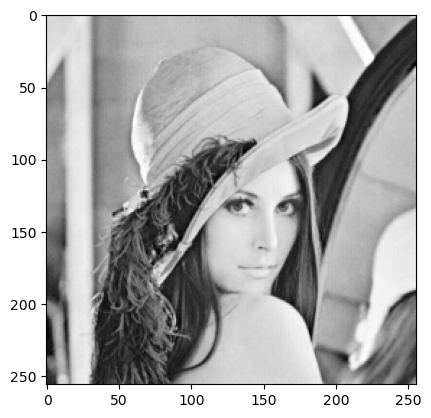

In [15]:
# Ruta de la imagen
ruta_imagen = "files/Lenna.png"

# Abrir la imagen con PIL
imagen_pil = Image.open(ruta_imagen)

# Convertir la imagen a una matriz de NumPy
imagen_numpy = np.array(imagen_pil)
array_transposed = imagen_numpy.transpose((2, 0, 1))
red_channel = array_transposed[0]

# Mostrar información sobre la matriz de la imagen
print("Dimensiones de la imagen:", red_channel.shape)
print("Tipo de datos de la matriz:", red_channel.dtype)

# Mostrar la matriz de la imagen (opcional)
print("Matriz de la imagen:")
print(red_channel)

plt.imshow(red_channel, cmap='gray')

## Implementación del kernel

El kernel ($H$) es una matriz cuadrada cuyas dimensiones son $(2k+1) \times (2k+1)$, donde $k$ es un número entero positivo. Al utilizar el parámetro $k$ aseguramos que el kernel tenga tamaño impar. Los elementos de $k$ pueden tener valores arbitrarios de acuerdo al efecto que deseemos (los veremos más tarde). Por ahora, diremos que es deseable que la sumatoria de sus elementos sea igual a 1, si la sumatoria no es igual a 1 la imagen de salida será escalada. 

En este ejemplo, supondremos que $k=1$ y que los elementos de $H$ simulan un filtro detector de bordes verticales. 

[[-0.33333334  0.          0.33333334]
 [-0.33333334  0.          0.33333334]
 [-0.33333334  0.          0.33333334]]


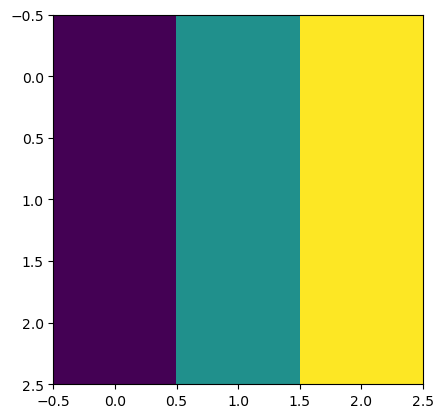

In [16]:
# Definir kernel (filtro)
k = 1
tamano = 2 * k + 1
kernel = np.zeros((tamano, tamano), np.float32) / (tamano**2)
kernel[0][0] = -1.0/3
kernel[1][0] = -1.0/3
kernel[2][0] = -1.0/3

kernel[0][2] = 1.0/3
kernel[1][2] = 1.0/3
kernel[2][2] = 1.0/3

# imprimir el filtro
print(kernel)
plt.imshow(kernel)
plt.show()

## Implementar correlación-cruzada

Recordando que:

$$
	G[i,j] =  \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] I[i+u,j+v]
$$
donde $I$ es la imagen de entrada y $H$ el kernel.

### Padding

En este ejemplo usaremos padding p=0. Esto significa que no se agregan capas al rededor de la imagen de entrada.



In [17]:
red_channel.shape

(256, 256)

In [19]:
# Primero implementaremos la función tal cual se definió para el elemento i,j de G
def correlacionPixel(H, I, i, j):    
    # Realiza la operación de correlación para el pixel i, j
    # Valida que accedas a elementos válidos en I
    m, n = I.shape
    doskmas1, _ = H.shape
    #TODO: Determina el valor de k y guardalo como tipo entero
    k = (H.shape[0] - 1)//2
    sumatoria = 0

    # TODO Implementa la convolución en el punto i,j, puedes hacerlo con ciclos anidados o con el producto punto de matrices.
    for u in range(-k, k+1):
        for v in range(-k, k+ 1):
            sumatoria += H[u+k, v+k] * I[i+u, j+v]
            
    
    resultado = sumatoria

    return resultado.astype(int)


# A continuación implementamos la correlación cruzada
def correlacionCruzada(H, I):
    doskmas1, _ = H.shape
    #TODO: Determina el valor de k y guardalo como tipo entero
    k = (H.shape[0] - 1)//2
    m, n = I.shape

    #TODO: Construye una matriz G del mismo tamaño que I
    G = np.zeros(I.shape)

    # Realiza la correlación para cada elemento de I
    for i in range(k, m-k):
        for j in range(k, n-k):
            G[i,j] = correlacionPixel(H,I,i,j)
    return G

In [20]:
correlacionPixel(H = kernel, I = red_channel, i=1, j=1)

0

## Prueba

Ahora haremos la convolución sobre nuestra imagen de entrada. Además, aunque no es muy común en las redes, En algunos casos se puede aplicar una función de activación. Solo para propósitos de prueba, pasaremos el resultado por una función relu. Si todo va bien debes obtener al final una imagen como esta:


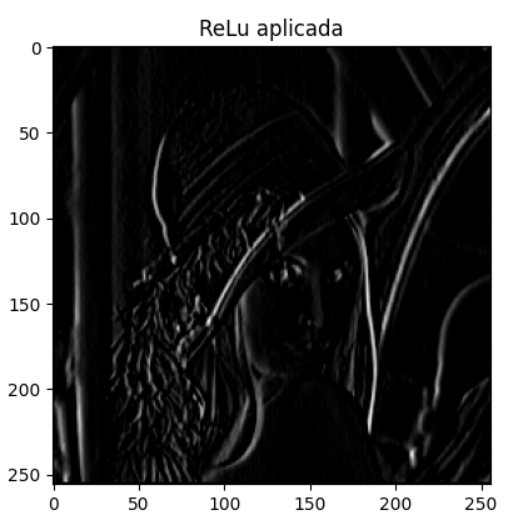

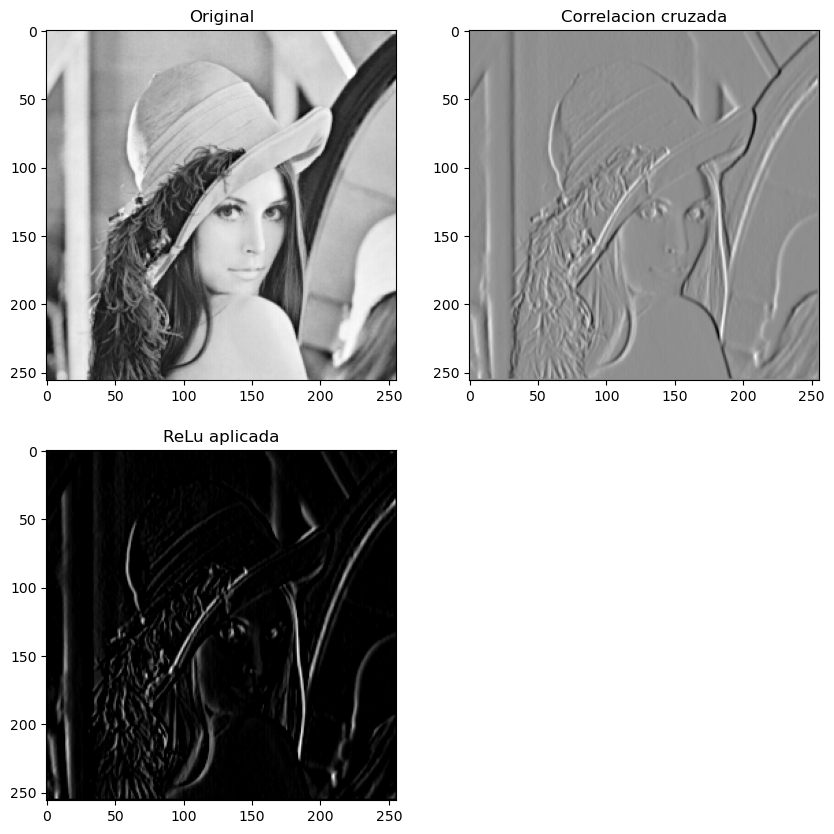

In [22]:
#aplicar la correlación cruzada
resultado = correlacionCruzada(H = kernel, I = red_channel)
relu_activated = np.maximum(0, resultado)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(red_channel, cmap = 'gray')
plt.title('Original')

plt.subplot(222)
plt.imshow(resultado, cmap = 'gray')
plt.title('Correlacion cruzada')

plt.subplot(223)
plt.imshow(relu_activated, cmap = 'gray')
plt.title('ReLu aplicada')

plt.show()

Contesta las siguientes preguntas:

- ¿Por que en la imagen relu_activated solo se ven algunos bordes verticales y no todos?

Porque de igual forma en el codigo mostrado, no se esta haciendo algun tipo de padding para que le Imagen de salida sea de igual tamaño, por lo que en los contornos no se logran apreciar los bordes verticales, ademas que en la correlacion cruzada hay bordes que existen, pero son muy tenues, lo que hace que al momento de aplicar relu, los elimina y los pone mas del lado 0 que de 1.


- ¿Que padding debemos utilizar para evitar los contornos vacíos en la imagen de salida?

Como k = 1, por lo que con un padding = 2, quedaria perfecto, para que la salida sea igual.


Ve más alla, puedes incluir max pooling?

Si.

## Aplicando max polling a G

In [25]:
def max_pooling(G, stride=2, window=2):
    # Calcula las dimensiones de la salida del max pooling
    out_height = (G.shape[0] - window) // stride + 1
    out_width = (G.shape[1] - window) // stride + 1
    
    # Inicializa la matriz de salida del max pooling
    max_pool = np.zeros((out_height, out_width))
    
    # Itera sobre las ventanas en la matriz de entrada y aplica max pooling
    for i in range(0, G.shape[0] - window + 1, stride):
        for j in range(0, G.shape[1] - window + 1, stride):
            window_region = G[i:i+window, j:j+window]
            max_pool[i//stride, j//stride] = np.max(window_region)
    
    return max_pool

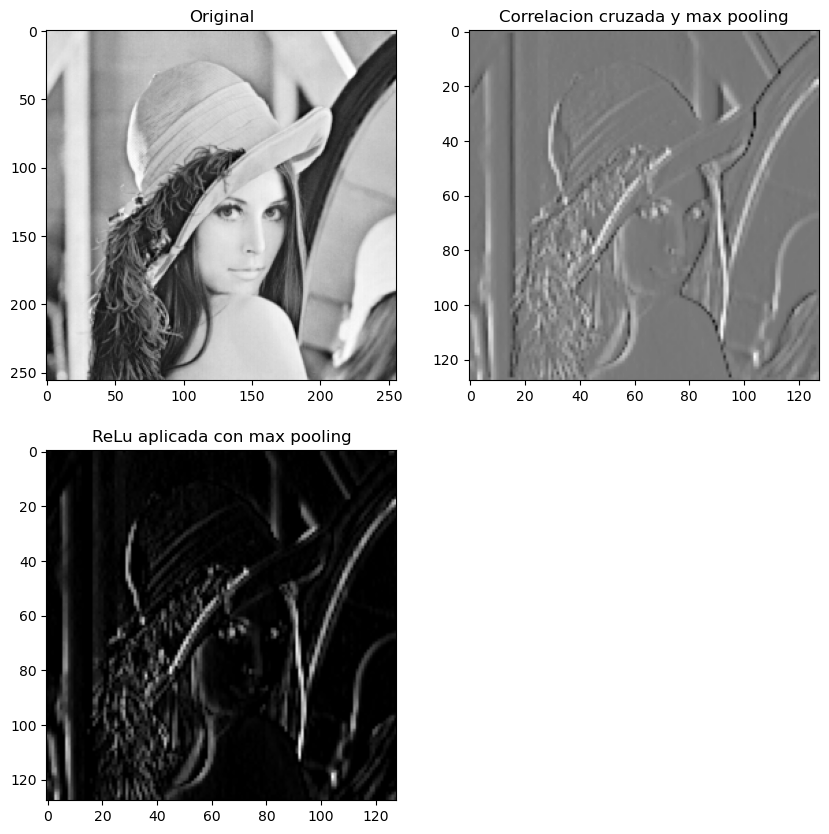

In [26]:
resultado = correlacionCruzada(H = kernel, I = red_channel)
relu_activated = np.maximum(0, resultado)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(red_channel, cmap = 'gray')
plt.title('Original')

plt.subplot(222)
plt.imshow(max_pooling(resultado), cmap = 'gray')
plt.title('Correlacion cruzada y max pooling')

plt.subplot(223)
plt.imshow(max_pooling(relu_activated), cmap = 'gray')
plt.title('ReLu aplicada con max pooling')

plt.show()

## Conclusión:


La aplicación de un kernel dentro de una imagen es fundamental para detectar patrones en ella, ya que depende completamente de la forma del kernel o, mejor dicho, del patrón que se busca en cada parte de la imagen. Al aplicar un kernel para encontrar líneas verticales, por ejemplo, podemos observar cómo funciona sobre la imagen, especialmente cuando se combina con una variable de activación, lo que nos permite identificar con mayor detalle los picos dentro de nuestro mapa de características.

Es importante destacar que el uso de múltiples kernels puede ayudarnos a detectar una variedad más amplia de patrones dentro de una imagen. Sin embargo, esto aumentaría la complejidad espacial y temporal al ejecutarse. A pesar de ello, su utilización abre nuevas posibilidades en el desarrollo de la visión por computadora y amplía el número de aplicaciones de las redes neuronales mediante la aplicación de la convolución.